In [1]:
"""
● 자연어 처리 순서
    0. 훈련데이터, 검증 데이터, 테스트 데이터 분리
    1. 자연어 전처리
        1) 토큰화 : 주어진 문자열을 문자 단위로 자름
            (1) spacy
            (2) NLTK
            (3) 띄어쓰기
            (4) 한국어 띄어쓰기
            (5) 형태소 토큰화
            (6) 문자 토큰화
        2) 단어집합 생성
        3) 단어의 정수 인코딩
        4) 길이 다른 문장을 패딩
        5) 단어 벡터화
        6) 배치화 : 훈련 샘플들의 배치 생성 + 패딩
    2. 룩업 테이블(Lookup Table) : 단어들을 임베딩 벡터로 맵핑
"""

'\n● 자연어 처리 순서\n    1. 토큰화 : 주어진 문자열을 문자 단위로 자름\n    2. 단어집합 생성\n    3. 정수 인코딩\n    4. 패딩\n    5. 벡터화\n'

In [34]:
"""
(1) spacy 설치
    !pip install spacy
    !python -m spacy download en

(2) NLTK 설치
    !pip install nltk
    
(5) 형태소 토큰화
    https://cleancode-ws.tistory.com/97
    https://luminitworld.tistory.com/104
"""

Processing c:\users\bang\jupyterprojects\mecab-ko-for-google-colab\mecab-ko-for-google-colab\mecab_python-0.996_ko_0.9.2_msvc-cp38-cp38-win_amd64.whl


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Bang\\JupyterProjects\\Mecab-ko-for-Google-Colab\\Mecab-ko-for-Google-Colab\\mecab_python-0.996_ko_0.9.2_msvc-cp38-cp38-win_amd64.whl'



In [5]:
# 1) 토큰화 - 영어
en_text = "A Dog Run back corner spare bedrooms"

# (1) 토큰화 - spaCy
import spacy
spacy_en = spacy.load('en_core_web_sm')

def tokenize(en_text):
    return [tok.text for tok in spacy_en.tokenizer(en_text)]

print(tokenize(en_text))

# (2) 토큰화 - nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

print(word_tokenize(en_text))

# (3) 토큰화 - 띄어쓰기
print(en_text.split())

# 1) 토큰화 - 한국어
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"

# (4) 토큰화 - 한국어 띄어쓰기
print(kor_text.split())

# (5) 토큰화 - 형태소 토큰화
from konlpy.tag import Mecab
mecab=Mecab(dicpath='C:/mecab/mecab-ko-dic')
print(mecab.morphs('아버지가 방에들어가신다'))

# (6) 토큰화 - 문자 토큰화
print(list(en_text))
print(list(kor_text))

['A', 'Dog', 'Run', 'back', 'corner', 'spare', 'bedrooms']
['A', 'Dog', 'Run', 'back', 'corner', 'spare', 'bedrooms']
['A', 'Dog', 'Run', 'back', 'corner', 'spare', 'bedrooms']
['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']
['아버지', '가', '방', '에', '들어가', '신다']
['A', ' ', 'D', 'o', 'g', ' ', 'R', 'u', 'n', ' ', 'b', 'a', 'c', 'k', ' ', 'c', 'o', 'r', 'n', 'e', 'r', ' ', 's', 'p', 'a', 'r', 'e', ' ', 'b', 'e', 'd', 'r', 'o', 'o', 'm', 's']
['사', '과', '의', ' ', '놀', '라', '운', ' ', '효', '능', '이', '라', '는', ' ', '글', '을', ' ', '봤', '어', '.', ' ', '그', '래', '서', ' ', '오', '늘', ' ', '사', '과', '를', ' ', '먹', '으', '려', '고', ' ', '했', '는', '데', ' ', '사', '과', '가', ' ', '썩', '어', '서', ' ', '슈', '퍼', '에', ' ', '가', '서', ' ', '사', '과', '랑', ' ', '오', '렌', '지', ' ', '사', '왔', '어']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
# 2) 토큰화 + 단어집합 생성

# 모듈 불러오기
import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

# 데이터 크롤링
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename = "ratings.txt")
data = pd.read_table('ratings.txt') # 데이터 프레임에 저장
data[:10]

# 데이터셋 제작
print('전체 샘플의 수 : {}'.format(len(data)))
sample_data = data[:100]
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 불용어 제거
sample_data[:10]

# 문자열 형태소 분석
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'] # 불용어 제거
tokenizer = Mecab(dicpath='C:/mecab/mecab-ko-dic')
tokenized=[]
for sentence in sample_data['document']:
    temp = tokenizer.morphs(sentence) # 문장 단위 분류
    temp = [word for word in temp if not word in stopwords] # 단어 단위 분류 + 불용어 제거
    tokenized.append(temp)
    
print(tokenized[:10])

# 단어 집합 생성
vocab = FreqDist(np.hstack(tokenized)) # FreqDist() : 단어 빈도수 계산 및 추출

print('단어 집합의 크기 : {}'.format(len(vocab))) # 총 단어 개수
print('단어 빈도수 : {}'.format(vocab['재밌'])) # 특정 단어 빈도수

vocab_size = 500
vocab = vocab.most_common(vocab_size) # 빈도수 높은 단어만 추출

print('단어 집합의 크기 : {}'.format(len(vocab))) # 빈도수 높은 단어 개수

전체 샘플의 수 : 200000
[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '해', '문화', '산업', '부러웠', '는데', '사실', '우리', '나라', '에서', '그', '어려운', '시절', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '감사', '합니다'], ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'], ['연기', '진짜', '개', '쩔', '구나', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'], ['사랑', '을', '해', '본', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', '인', '듯']]
단어 집합의 크기 : 664
단어 빈도수 : 10
단어 집합의 크기 : 500


<ipython-input-10-db521b27739a>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 불용어 제거
<ipython-input-10-db521b27739a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 불용어 제거


In [13]:
# 3) 단어의 정수 인코딩
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

encoded = []
for line in tokenized: # 입력 데이터에서 1줄씩 문장 읽음
    temp = []
    for w in line: # 각 줄에서 1개씩 글자 읽음
        try:
            temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
        except KeyError: # 단어 집합에 없는 단어인 경우 unk로 대체
            temp.append(word_to_index['unk']) # unk의 인덱스로 변환
    encoded.append(temp)
    
print(encoded[:10])

[[78, 27, 9, 4, 50, 41, 79, 16, 28, 29], [188, 5, 80, 189, 190, 191, 42, 192, 114, 5, 193, 194, 21, 115, 195, 196, 13, 51, 81, 116, 30, 42, 197, 117, 118, 31, 198, 5, 199, 200, 17, 114, 7, 82, 52, 17, 43, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84], [205, 119, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11], [44, 33, 120, 210, 211, 212, 213, 68, 45, 34, 13, 214, 121, 15, 2, 215, 69, 8, 33, 3, 35], [216, 217, 218, 219, 7, 220, 17, 3], [122, 5, 21, 36, 43, 123, 124, 53, 118, 31, 85, 5, 14, 7, 3], [125, 37, 221, 41, 79, 37], [120, 222, 55, 223, 55, 86, 224, 46, 9, 4, 47, 25], [56], [225, 87, 88, 226, 227, 57, 89]]


리뷰의 최대 길이 : 63
리뷰의 최소 길이 : 63
리뷰의 평균 길이 : 63.000000
[[78, 27, 9, 4, 50, 41, 79, 16, 28, 29, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [188, 5, 80, 189, 190, 191, 42, 192, 114, 5, 193, 194, 21, 115, 195, 196, 13, 51, 81, 116, 30, 42, 197, 117, 118, 31, 198, 5, 199, 200, 17, 114, 7, 82, 52, 17, 43, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [205, 119, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


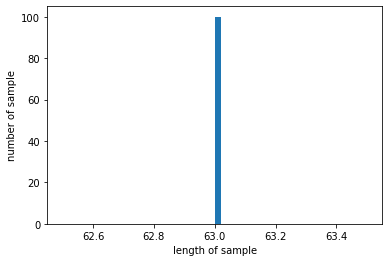

리뷰의 최대 길이 : 63
리뷰의 최소 길이 : 63
리뷰의 평균 길이 : 63.000000
[[78, 27, 9, 4, 50, 41, 79, 16, 28, 29, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [188, 5, 80, 189, 190, 191, 42, 192, 114, 5, 193, 194, 21, 115, 195, 196, 13, 51, 81, 116, 30, 42, 197, 117, 118, 31, 198, 5, 199, 200, 17, 114, 7, 82, 52, 17, 43, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [205, 119, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


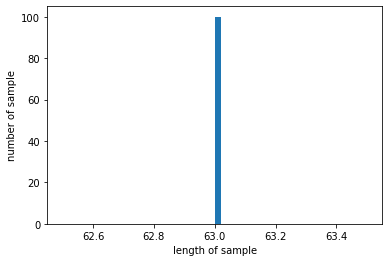

In [17]:
# 4) 길이 다른 문장을 패딩
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
print(encoded[:3])
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

max_len = max(len(l) for l in encoded)
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 최대 긴 리뷰보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 짧은만큼 'pad'토큰으로 채우기
        
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
print(encoded[:3])
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()